In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


/var/folders/gc/n9f0hqw521d0_z3nmf82zyrc0000gn/T/ipykernel_2137/462593202.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
csv_path = "https://raw.githubusercontent.com/mk-gurucharan/Regression/master/Salary_Data.csv"

In [3]:
df = pd.read_csv(csv_path)



In [4]:
correlation = df.corr()

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='YearsExperience', ylabel='Density'>

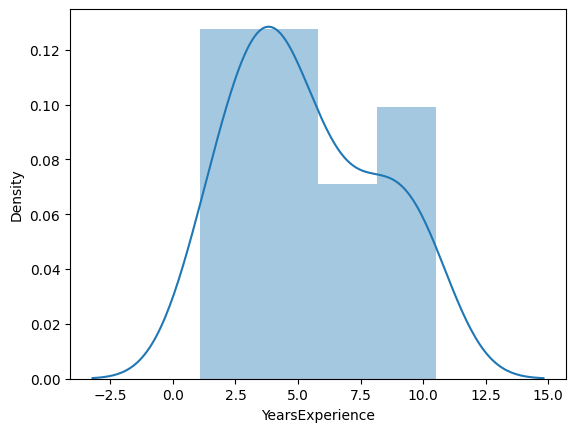

In [9]:
sns.distplot(df['YearsExperience'])

In [10]:
 # for now we ignore the seaborn warnings
# because the distplot is going to be replaced in the future
# and we currently don't have a better option for this kind of chart
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='YearsExperience', ylabel='Density'>

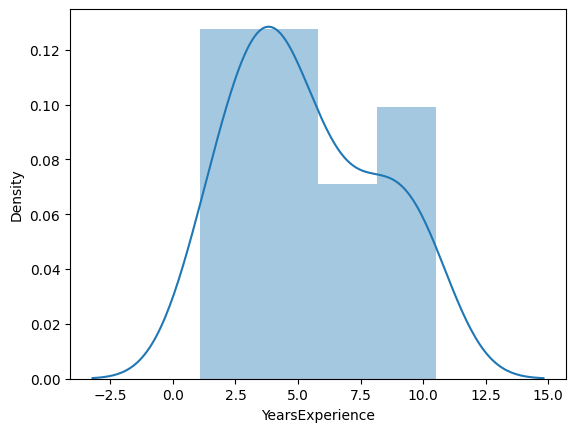

In [11]:
# quick chart, how is experience distributed in data
sns.distplot(df['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

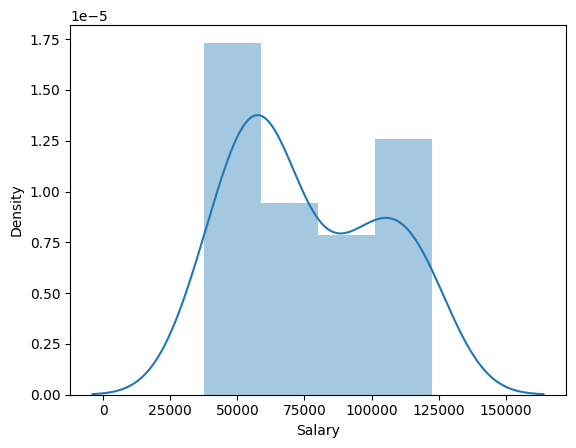

In [12]:
sns.distplot(df['Salary'])

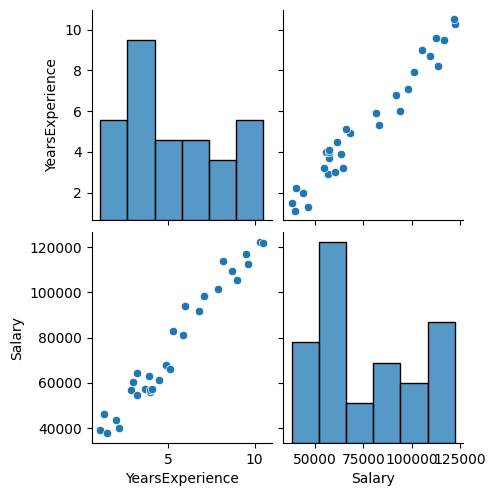

In [13]:
 sns.pairplot(df)

In [14]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [15]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [16]:
# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
X = df[['YearsExperience']]

# have only the target variable here (dependent variable)
y = df['Salary']

In [17]:
# create train and test sets of your dataset
# random_state is optional, you can lock this down in order to 
# to get same results always
# this examples reserves 30% for test data, 70% for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
intercept = lm.intercept_

# this will be a list of variables (to support multiple linear regression)
# the slopes of the different variables in the linear regression formula
coefs = lm.coef_

# if you want to have a nice table of different variable values:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
YearsExperience,9577.17175


In [20]:
# combine the variables for the linear regression formula
formula = f"y^ = {coefs[0]} * x + {intercept}"
formula

'y^ = 9577.171749746614 * x + 25975.814659541138'

In [21]:
# make test predictions with new data with our model
predictions = lm.predict(X_test)

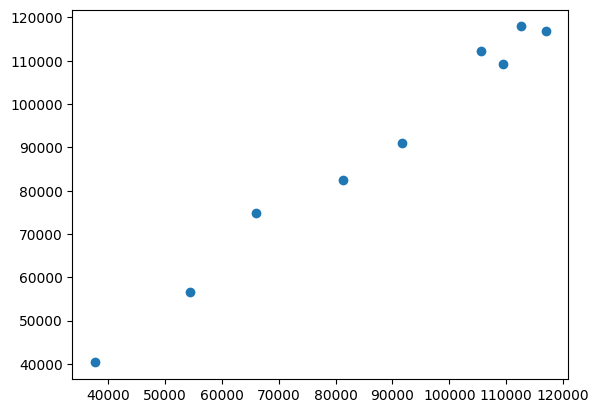

In [22]:
# these values follow a line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
# interesting idea to try, add a regression line:
# https://python-graph-gallery.com/scatterplot-with-regression-fit-in-matplotlib/
plt.scatter(y_test, predictions)
plt.show()

In [23]:
# this is our separate test data candidate
test_experience = 6

# let's try with some new imaginary data
tester_row = {
    'YearsExperience': test_experience
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [24]:
result = lm.predict(tester_row)[0]

print()
print(f"Predicted salary with {test_experience} years of work experience:")
print(f"{round(float(result), 2)} $")
print("----------------")


Predicted salary with 6 years of work experience:
83438.85 $
----------------


In [25]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "$")

# R-squared. 0 = the model describes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
3038.68 $

MSE
17978409.5 $^2

RMSE:
4240.1 $

R-squared:
0.97


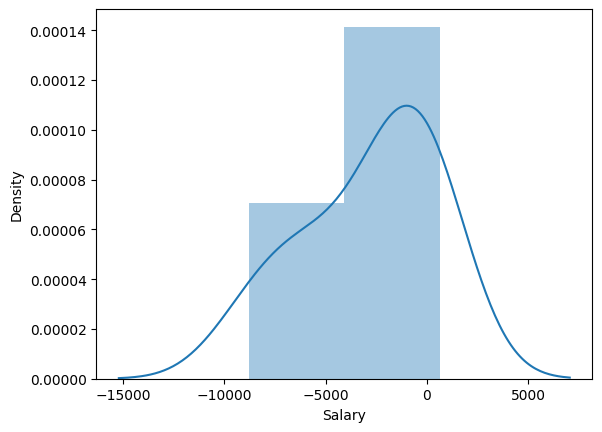

In [26]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - predictions))
plt.show()
plt.close()

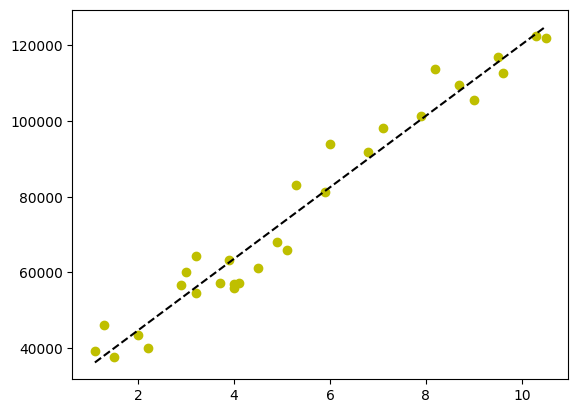

In [27]:
 # this works only with two variables
# how it would be calculated manually
plot_x = df['YearsExperience']
plot_y = df['Salary']

coef_plot = np.polyfit(plot_x,plot_y,1)
poly1d_fn = np.poly1d(coef_plot)

# poly1d_fn is now a function which takes in x and returns an estimate for y
#'--k'=black dashed line, 'yo' = yellow circle marker
plt.plot(plot_x, plot_y, 'yo', plot_x, poly1d_fn(plot_x), '--k') 